In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
#import plotting
import os
import tensorflow as tf
import tensorflow
from qkeras.utils import load_qmodel
import time

Init_OS_path = os.environ['PATH']

2025-10-23 12:18:58.965483: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#This script was run on Correlator 4, FNAL.

In [3]:
VIVADO_DIR = "/data/Xilinx/Vivado/"

In [4]:
#This conversion script was run on correlator 4 at Fermilab
#os.environ['PATH'] = '/data/Xilinx/Vivado/2020.1/bin:' + Init_OS_path
"""I don't need the above command if I use the file run_vivado_hls.sh instead."""

BACKEND = "Vivado"

In [5]:
model = load_qmodel('noNorm_train_qkL1JetTagModel.h5')

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
2025-10-23 12:19:10.840508: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


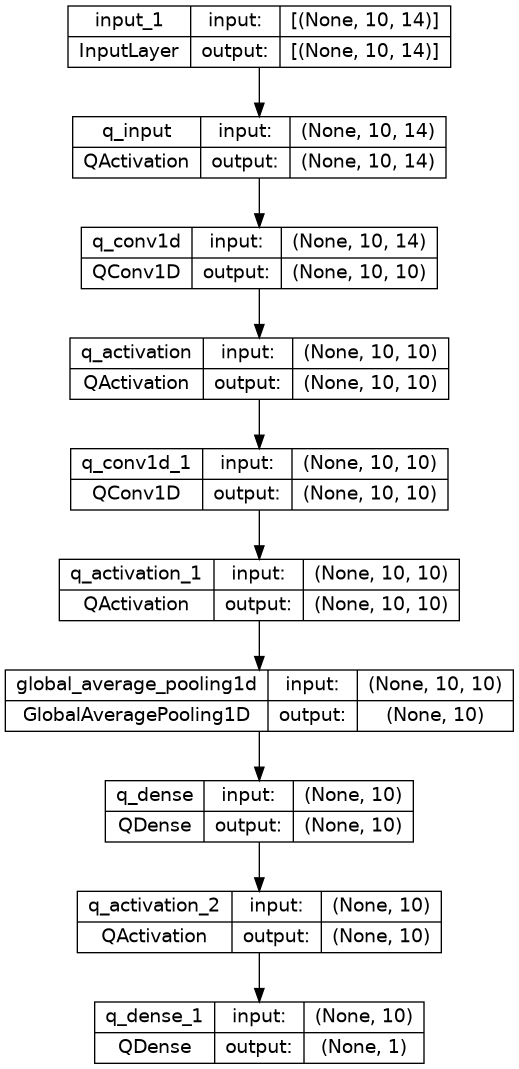

In [6]:
tensorflow.keras.utils.plot_model(model, show_shapes=True)

In [7]:
import hls4ml
config = hls4ml.utils.config_from_keras_model(model, 
                                            granularity='name', 
                                            backend=BACKEND,
                                            default_precision = 'fixed<14,8, AP_TRN, AP_SAT>',
                                            )
print("-----------------------------------")

-----------------------------------


In [8]:
config["LayerName"]["input_1"]["Precision"] = "fixed<12,6,AP_TRN, AP_SAT>"

config["LayerName"]["q_input"]["Precision"] = "fixed<12,6, AP_TRN, AP_SAT>"

config['LayerName']['q_conv1d']['ReuseFactor'] = 1
config['LayerName']['q_conv1d']["Precision"]["accum"] = "fixed<14,8, AP_TRN, AP_SAT>"
config['LayerName']['q_conv1d']["Precision"]["result"] = "fixed<14,8, AP_TRN, AP_SAT>"

config["LayerName"]["q_activation"]["Precision"]["result"] = "ufixed<14,8, AP_TRN, AP_SAT>"

config['LayerName']['q_conv1d_1']['ReuseFactor'] = 1
config['LayerName']['q_conv1d_1']["Precision"]["accum"] = "fixed<16, 12, AP_TRN, AP_SAT>"
config['LayerName']['q_conv1d_1']["Precision"]["result"] = "fixed<14, 8, AP_TRN, AP_SAT>"

config["LayerName"]["q_activation_1"]["Precision"]["result"] = "ufixed<10,5, AP_TRN, AP_SAT>"

config["LayerName"]["global_average_pooling1d"]["Precision"]["accum"] = "fixed<16,12, AP_TRN, AP_SAT>"
config["LayerName"]["global_average_pooling1d"]["Precision"]["result"] = "fixed<14,8, AP_TRN, AP_SAT>"

config['LayerName']['q_dense']["Precision"]["accum"] = "fixed<14, 10, AP_TRN, AP_SAT>"
config['LayerName']['q_dense']["Precision"]["result"] = "fixed<14, 8, AP_TRN, AP_SAT>"

config["LayerName"]["q_activation_2"]["Precision"]["result"] = "ufixed<14, 8, AP_TRN, AP_SAT>"

config['LayerName']['q_dense_1']["Precision"]["accum"] = "fixed<14, 10, AP_TRN, AP_SAT>"
config['LayerName']['q_dense_1']["Precision"]["result"] = "fixed<14, 8, AP_TRN, AP_SAT>"

In [9]:
hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       hls_config=config,
                                                       output_dir='qkmodel_4_CMSSW/TOoLLiP_v3',
                                                        project_name='TOoLLiP_v3',
                                                       part='xcvu13p-flga2577-2-e',
                                                        namespace='hls4ml_model_emu_v3',
                                                        write_weights_txt=False,
                                                        write_emulation_constants=True,
                                                        ) #part vcu13....

"""Noe:  Emulation arguments are not meant for synthesis. The #ifdef or #ifndef SYN commands needed for synthesis are removed 
when using these argument. This is meant to build a C++ library for CMSSW emualation. For the model to pass synthesisis, I need to remove those 
arguments in the line above and try a Vivado/Vitis version that will lead to a successful synthesis step."""

'Noe:  Emulation arguments are not meant for synthesis. The #ifdef or #ifndef SYN commands needed for synthesis are removed \nwhen using these argument. This is meant to build a C++ library for CMSSW emualation. For the model to pass synthesisis, I need to remove those \narguments in the line above and try a Vivado/Vitis version that will lead to a successful synthesis step.'

In [10]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file="hls_model.png")

In [11]:
hls_model.compile()

## Only the code below if emulation arguments are not added

In [12]:
print("Vivado Versions:")
!ls -1 $VIVADO_DIR
print("Edit the file run_vivado_hls.sh in this directory based on what you need.")

Vivado Versions:
2020.1
2021.2
2022.1
2022.2
2023.1
2023.2
2024.1
Edit the file run_vivado_hls.sh in this directory based on what you need.


For this line to work, you need set the correct version using the `VERSION` variable in `run_vivado_hls.sh`...

In [13]:
start_syn = time.time()
# report = hls_model.build(csim=False)
!bash run_vivado_hls.sh
end_syn = time.time()

Available Vivado versions:
2020.1
2021.2
2022.1
2022.2
2023.1
2023.2
2024.1

Chose VIVADO Version 2020.1.

Sourcing /data/Xilinx/Vivado/2020.1/settings64.sh

1) Launching vivado_hls from directory /home/rmarroqu/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/stop_4b_4c/noNorm_noSigmoid/noNorm/qkmodel/TOoLLiP_v3


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2020.1 (64-bit)
  **** SW Build 2902540 on Wed May 27 19:54:35 MDT 2020
  **** IP Build 2902112 on Wed May 27 22:43:36 MDT 2020
    ** Copyright 1986-2020 Xilinx, Inc. All Rights Reserved.

source /data/Xilinx/Vivado/2020.1/scripts/vivado_hls/hls.tcl -notrace
INFO: Applying HLS Y2K22 patch v1.2 for IP revision
INFO: [HLS 200-10] Running '/data/Xilinx/Vivado/2020.1/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'rmarroqu' on host 'correlator4.fnal.gov' (Linux_x86_64 version 5.14.0-427.42.1.el9_4.x86_64) on Thu Oct 23 11:35:23 CDT 2025
INFO: [HLS 200-10] On os "AlmaLinux release 9.4 (

In [14]:
syn_time = (end_syn - start_syn)/60

In [15]:
print(f'Synthesis took {syn_time:.1f} minutes to complete.')

Synthesis took 38.6 minutes to complete.


In [15]:
try:
    hls_results = report['CSynthesisReport']
    synth = "PASSED"

#except KeyError:
except NameError: #Try the above, except if we get a KeyError. In this case, say synthesis fails
    synth = "FAILED" # sets this string if synthesis fails 


In [16]:
#hls4ml.report.read_vivado_report('qkmodel/hls4ml_prj/')

In [13]:
parsed_report = hls4ml.report.parse_vivado_report('qkmodel/TOoLLiP_v3/')

Vivado synthesis report not found.
Implementation report not found.
Timing report not found.


In [14]:
csynth_report = parsed_report['CSynthesisReport']

In [15]:
for key, value in csynth_report.items():
        csynth_report[key] = float(csynth_report[key])

In [16]:
avail = ['AvailableLUT','AvailableURAM', 'AvailableFF', 'AvailableDSP', 'AvailableBRAM_18K']
used = ['LUT', 'URAM', 'FF', 'DSP', 'BRAM_18K' ]
for i in range(len(used)):
    csynth_report[used[i]] = (csynth_report[used[i]]/ csynth_report[avail[i]])*100
    del csynth_report[avail[i]]

In [17]:
categories = list(csynth_report.keys())
values = list(csynth_report.values())

In [18]:
import matplotlib.pyplot as plt

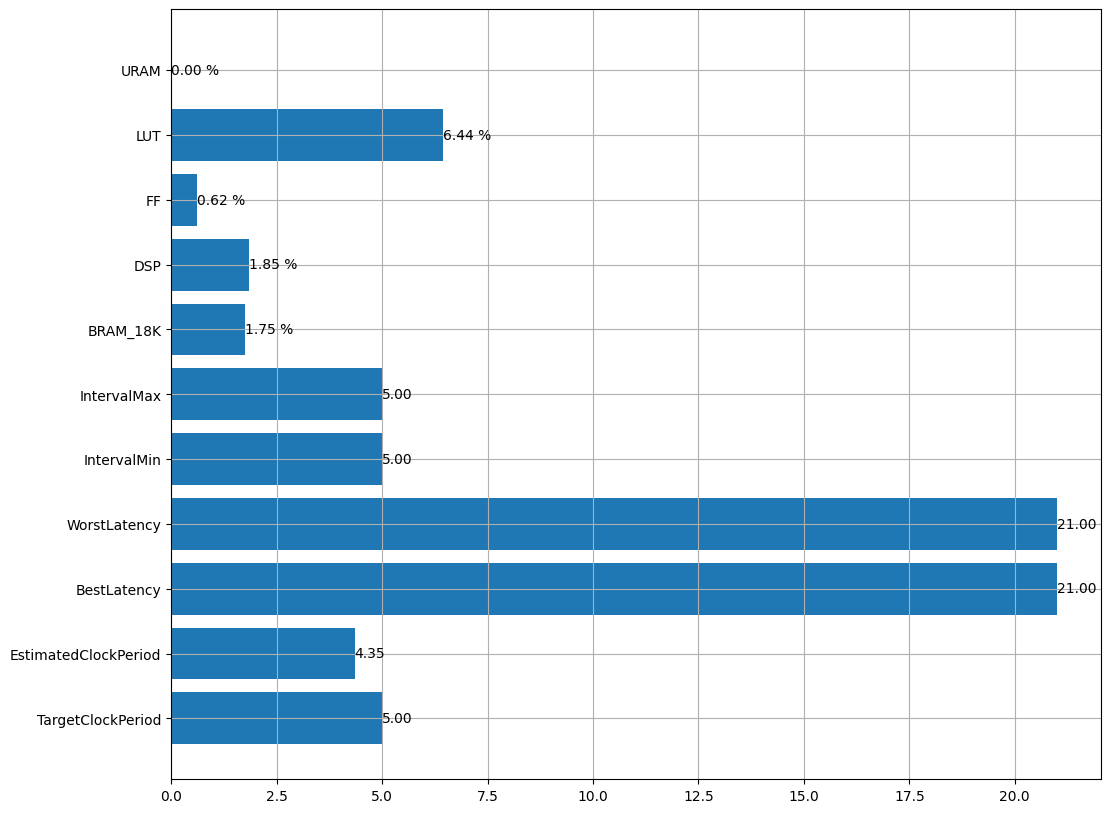

In [20]:
fig, ax = plt.subplots(figsize=(12,10))
hbars = ax.barh(categories, values, )

labels = [
    f"{csynth_report[l]:.2f} %" if l in used else f"{csynth_report[l]:.2f}"
    for l in csynth_report.keys()  # or however your bars are ordered
]

ax.bar_label(hbars, labels=labels)
ax.grid(True)
plt.savefig("qkmodel/TOoLLiP_v3/reportInfo.pdf")
plt.savefig("qkmodel_4_CMSSW/TOoLLiP_v3/reportInfo.pdf")